In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

import seaborn as sns
from new_eval import new_get_run_metrics, get_config, baseline_data, LoadInfo, get_modelpaths_by_filter
from plot_utils import basic_plot
from models import build_model
from typing import List

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

models_dir = Path("../models")
device = "cpu" # Set to "cuda" if needed

In [2]:
def plot_collection(load_info_collection: List[LoadInfo], device: str = "cuda", yhigh_lim: float = float('inf'), baselines: List[str] = None, title=""):
    metrics = {}
    for path, step, alt_path, alternative_name, name_addon in load_info_collection:
        conf = get_config(path / "config.yaml")
        name = alternative_name if alternative_name != "" else conf.wandb.name + name_addon
        metrics[name] = new_get_run_metrics(path, step=step, include_noise=False, device=device, alternative_train_conf_path=alt_path)

    if baselines is not None:
        train_conf_path = load_info_collection[0].alternative_train_conf_path if load_info_collection[0].alternative_train_conf_path is not None else load_info_collection[0].path / "config.yaml"
        baseline_mets = baseline_data(train_conf_path, device=device, include_noise=False)
        metrics.update({key: baseline_mets[key] for key in baselines if key in baseline_mets})
    
    basic_plot(metrics, yhigh_lim=yhigh_lim, title=title)
    plt.show()

def evaluate_soft_prompts(parent_dir: Path, device: str = "cuda", title: str = "Soft prompts"):
    # Load the model confs
    model_paths = get_modelpaths_by_filter(models_parent_directories=[parent_dir], config_filter={})

    load_info_collection = [LoadInfo(path, step=-1) for path in model_paths]
    load_info_collection.append(LoadInfo(Path(get_config(model_paths[0] / "config.yaml").model.pretrained_model_dir),
                                            step=-1, alternative_name="Base model", alternative_train_conf_path=load_info_collection[0].path / "config.yaml"))

    # Evaluate all of them
    plot_collection(load_info_collection=load_info_collection, 
                    device=device, baselines=["chebyshev_5"], title=title)

../models/soft_prompting_front/prompt_dim_100/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 25600 

../models/soft_prompting_front/prompt_dim_80/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 20480 

../models/soft_prompting_front/prompt_dim_60/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 15360 

../models/soft_prompting_front/prompt_dim_90/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 23040 

../models/soft_prompting_front/prompt_dim_50/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 12800 

../models/soft_prompting_front/prompt_dim_70/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 17920 

../models/kernel_linear_regression/bigger_model/config.yaml


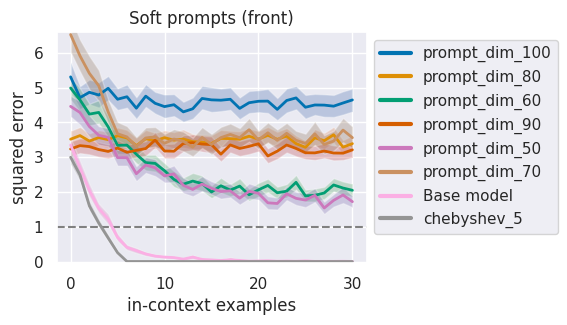

../models/soft_prompting_back/prompt_dim_69/config.yaml
SoftPromptBack Non-tranaible parameters: 7656705
SoftPromptBack Trainable parameters: 17664 

../models/soft_prompting_back/prompt_dim_99/config.yaml
SoftPromptBack Non-tranaible parameters: 7656705
SoftPromptBack Trainable parameters: 25344 

../models/soft_prompting_back/prompt_dim_89/config.yaml
SoftPromptBack Non-tranaible parameters: 7656705
SoftPromptBack Trainable parameters: 22784 

../models/soft_prompting_back/prompt_dim_49/config.yaml
SoftPromptBack Non-tranaible parameters: 7656705
SoftPromptBack Trainable parameters: 12544 

../models/soft_prompting_back/prompt_dim_59/config.yaml
SoftPromptBack Non-tranaible parameters: 7656705
SoftPromptBack Trainable parameters: 15104 

../models/soft_prompting_back/prompt_dim_79/config.yaml
SoftPromptBack Non-tranaible parameters: 7656705
SoftPromptBack Trainable parameters: 20224 

../models/kernel_linear_regression/bigger_model/config.yaml


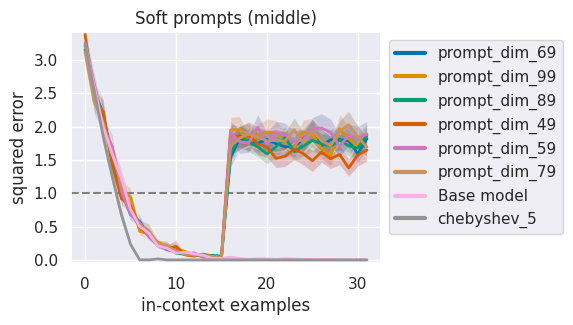

../models/soft_prompting_nopos_nonoise/prompt_dim_100/config.yaml
SoftPrompt Non-tranaible parameters: 1190273
SoftPrompt Trainable parameters: 25600 

../models/soft_prompting_nopos_nonoise/prompt_dim_80/config.yaml
SoftPrompt Non-tranaible parameters: 1190273
SoftPrompt Trainable parameters: 20480 

../models/soft_prompting_nopos_nonoise/prompt_dim_60/config.yaml
SoftPrompt Non-tranaible parameters: 1190273
SoftPrompt Trainable parameters: 15360 

../models/soft_prompting_nopos_nonoise/prompt_dim_90/config.yaml
SoftPrompt Non-tranaible parameters: 1190273
SoftPrompt Trainable parameters: 23040 

../models/soft_prompting_nopos_nonoise/prompt_dim_50/config.yaml
SoftPrompt Non-tranaible parameters: 1190273
SoftPrompt Trainable parameters: 12800 

../models/soft_prompting_nopos_nonoise/prompt_dim_70/config.yaml
SoftPrompt Non-tranaible parameters: 1190273
SoftPrompt Trainable parameters: 17920 

../models/polynomial_regression/base_model_nopos/config.yaml


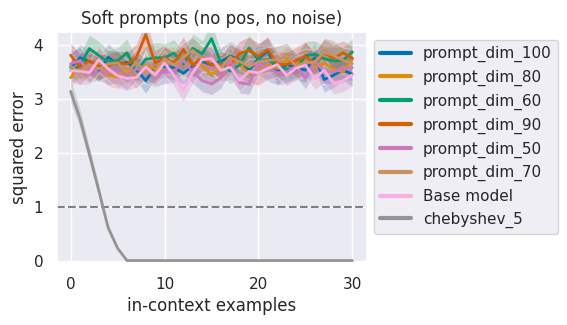

../models/soft_prompting_noisy/prompt_dim_100/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 25600 

../models/soft_prompting_noisy/prompt_dim_80/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 20480 

../models/soft_prompting_noisy/prompt_dim_60/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 15360 

../models/soft_prompting_noisy/prompt_dim_90/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 23040 

../models/soft_prompting_noisy/prompt_dim_50/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 12800 

../models/soft_prompting_noisy/prompt_dim_70/config.yaml
SoftPrompt Non-tranaible parameters: 7656705
SoftPrompt Trainable parameters: 17920 

../models/polynomial_regression/base_model_noisy/config.yaml


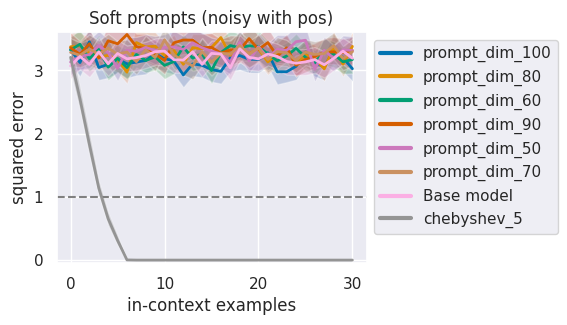

In [3]:
# Evaluate models
soft_prompting_front_parent = models_dir / "soft_prompting_front"
soft_prompting_back_parent = models_dir / "soft_prompting_back"
soft_prompting_nopos_nonoise_parent = models_dir / "soft_prompting_nopos_nonoise"
soft_prompt_noisy_parent = models_dir / "soft_prompting_noisy"

evaluate_soft_prompts(soft_prompting_front_parent, device=device, title="Soft prompts (front)")
evaluate_soft_prompts(soft_prompting_back_parent, device=device, title="Soft prompts (middle)")
evaluate_soft_prompts(soft_prompting_nopos_nonoise_parent, device=device, title="Soft prompts (no pos, no noise)")
evaluate_soft_prompts(soft_prompt_noisy_parent, device=device, title="Soft prompts (noisy with pos)")

../models/soft_prompting_small_back/prompt_dim_51/config.yaml
SoftPromptBack Non-tranaible parameters: 7656705
SoftPromptBack Trainable parameters: 13056 

../models/kernel_linear_regression/bigger_model/config.yaml


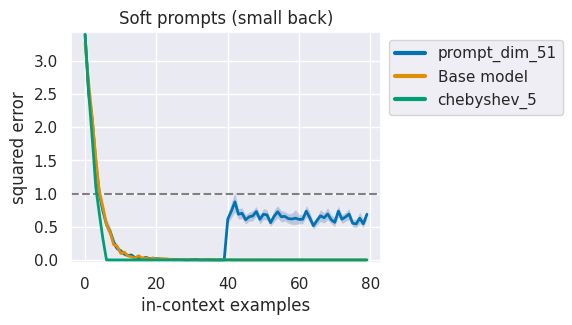

In [4]:
soft_prompting_small_back_parent = models_dir / "soft_prompting_small_back"
evaluate_soft_prompts(soft_prompting_small_back_parent, device=device, title="Soft prompts (small back)")